In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
#Dictionary of ticker symbols and their corresponding names
tickers = {
    'MSFT': 'Microsoft Corp',
    'AAPL': 'Apple Inc',
    'NVDA': 'NVIDIA Corp',
    'AMZN': 'Amazon.com Inc',
    'GOOGL': 'Alphabet Inc Class A',
    'META': 'Meta Platforms Inc Class A',
    'GOOG': 'Alphabet Inc Class C',
    'BRK-B': 'Berkshire Hathaway Inc Class B',
    'TSLA': 'Tesla Inc',
    'AVGO': 'Broadcom Inc',
    'LLY': 'Eli Lilly and Co',
    'JPM': 'JPMorgan Chase & Co',
    'UNH': 'UnitedHealth Group Inc',
    'V': 'Visa Inc Class A',
    'JNJ': 'Johnson & Johnson',
    'XOM': 'Exxon Mobil Corp',
    'HD': 'The Home Depot Inc',
    'MA': 'Mastercard Inc Class A',
    'PG': 'Procter & Gamble Co',
    'COST': 'Costco Wholesale Corp'
}

#Creating Ticker objects and storing them in the dictionary
ticker_objects = {symbol: yf.Ticker(symbol) for symbol in tickers.keys()}

#Loop through each ticker and display its info
for symbol, ticker in ticker_objects.items():
    print(f"Information for {symbol} ({tickers[symbol]}):")
    try:
        info = ticker.info
        print(info)  # or format this information as needed
    except Exception as e:
        print(f"Error retrieving information for {symbol}: {e}")
    print("\n---------------------------------------\n")


Information for MSFT (Microsoft Corp):
{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applicatio

In [ ]:
import yfinance as yf
import pandas as pd

# List of ticker symbols
tickers = [
    'MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META',
    'GOOG', 'BRK-B', 'TSLA', 'AVGO', 'LLY', 'JPM',
    'UNH', 'V', 'JNJ', 'XOM', 'HD', 'MA', 'PG', 'COST'
]

# Creating Ticker objects
ticker_objects = {symbol: yf.Ticker(symbol) for symbol in tickers}

# Define the period
start_date = "2019-01-01"
end_date = "2023-12-31"

# Loop through each ticker and fetch its historical data for the specified period
for symbol, ticker in ticker_objects.items():
    print(f"Data for {symbol} from 2019 to 2023:")
    try:
        history = ticker.history(start=start_date, end=end_date)
        # Extracting the relevant columns
        relevant_data = history[['Open', 'Close', 'High', 'Low', 'Volume', 'Stock Splits']]
        print(relevant_data)
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")
    print("\n---------------------------------------\n")


Data for MSFT from 2019 to 2023:
                                 Open       Close        High         Low  \
Date                                                                        
2019-01-02 00:00:00-05:00   94.532402   96.023270   96.621513   93.953148   
2019-01-03 00:00:00-05:00   95.054686   92.490776   95.140153   92.300852   
2019-01-04 00:00:00-05:00   94.693818   96.792427   97.343195   93.943636   
2019-01-07 00:00:00-05:00   96.517049   96.915878   98.064890   95.890319   
2019-01-08 00:00:00-05:00   97.846485   97.618584   98.729611   96.583519   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00-05:00  373.679993  374.579987  375.179993  372.709991   
2023-12-26 00:00:00-05:00  375.000000  374.660004  376.940002  373.500000   
2023-12-27 00:00:00-05:00  373.690002  374.070007  375.059998  372.809998   
2023-12-28 00:00:00-05:00  375.369995  375.279999  376.459991  374.160004   
2023-12-29 00:00:00-05:00  376.000000  376.

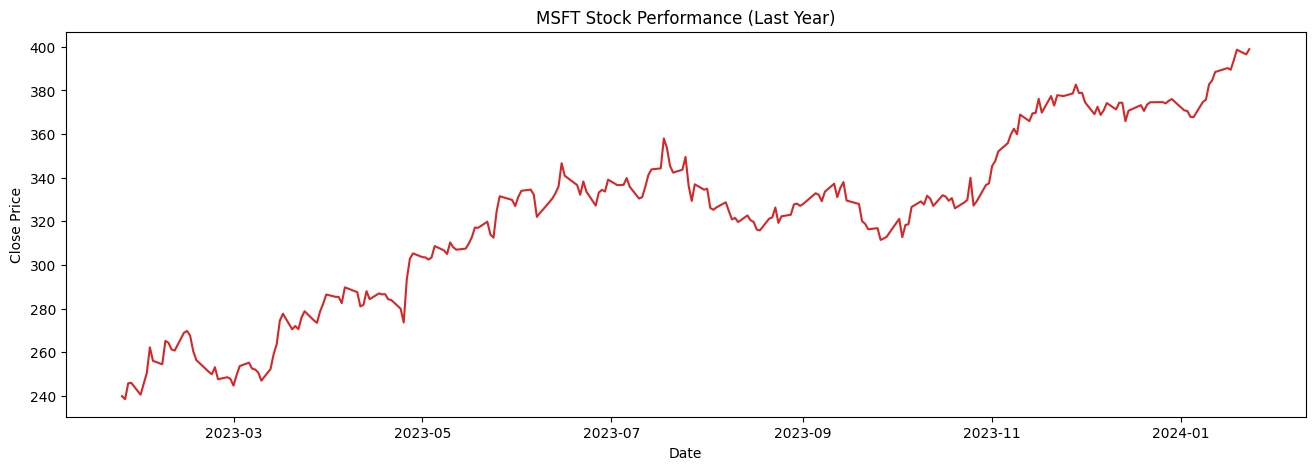

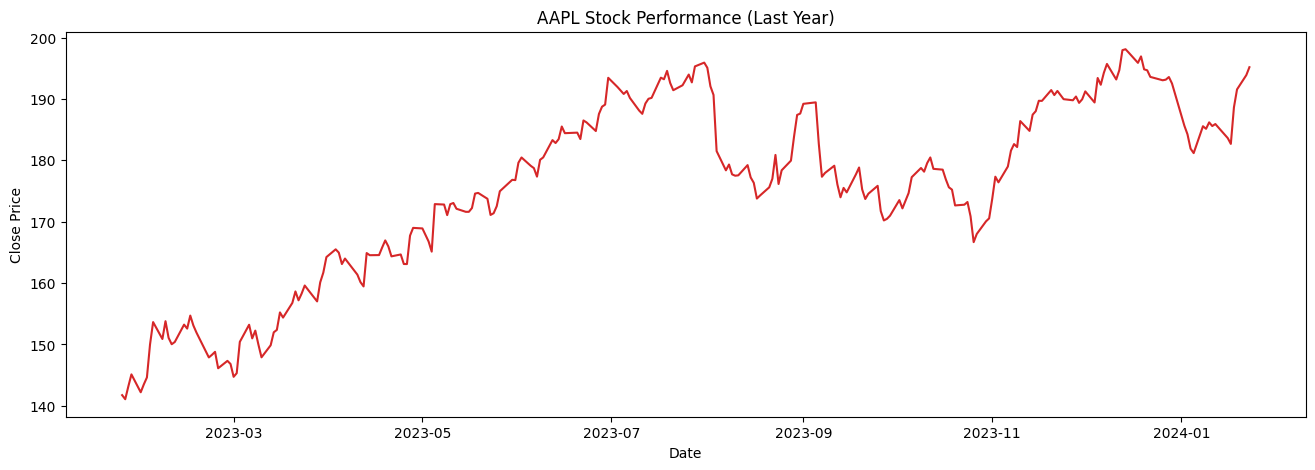

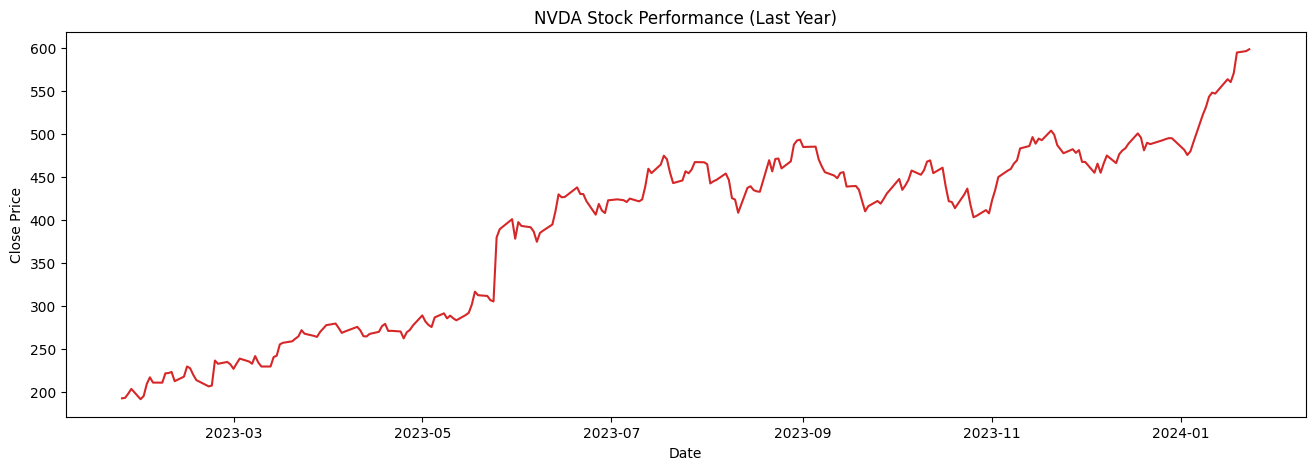

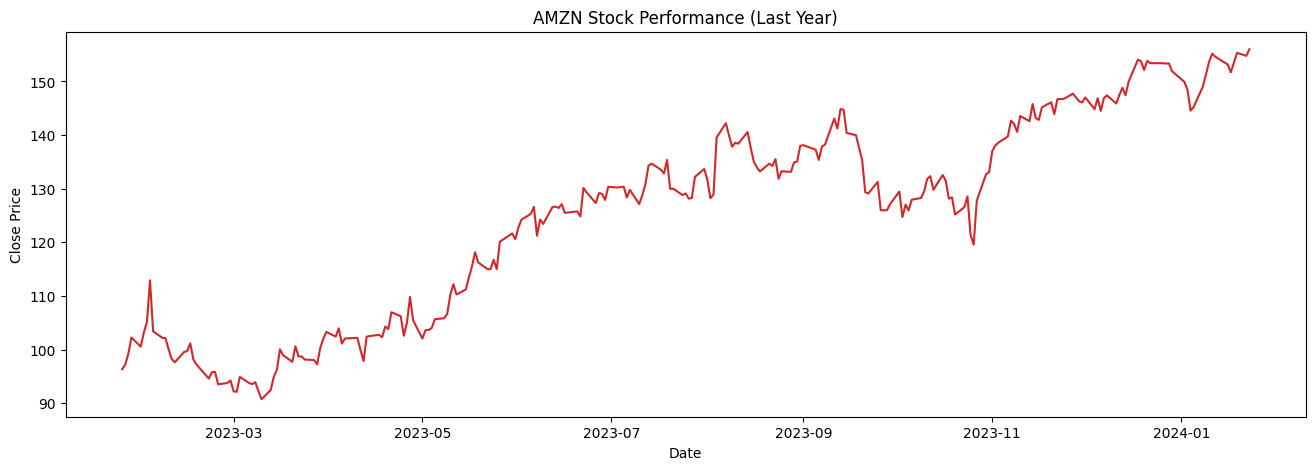

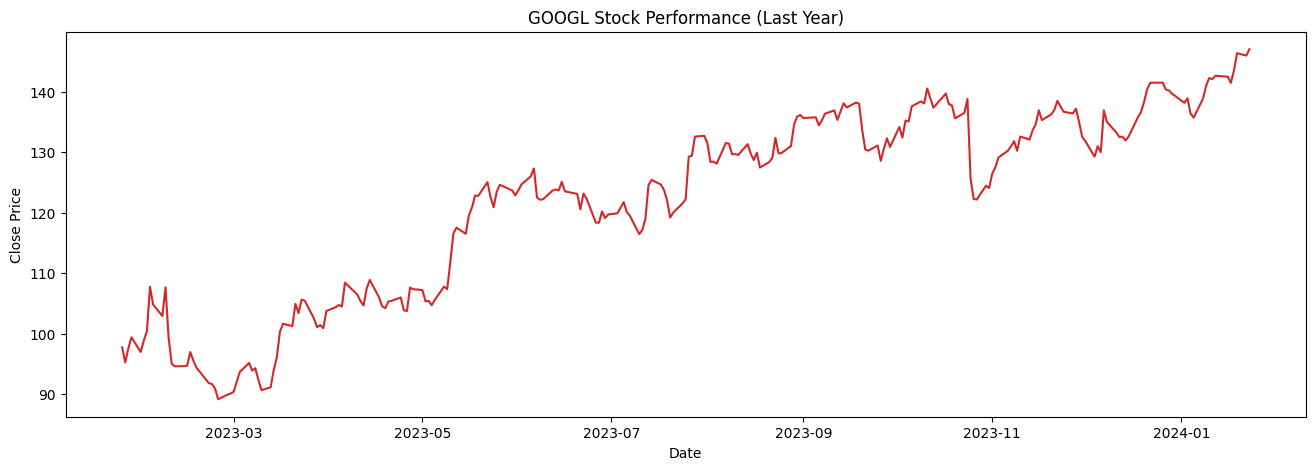

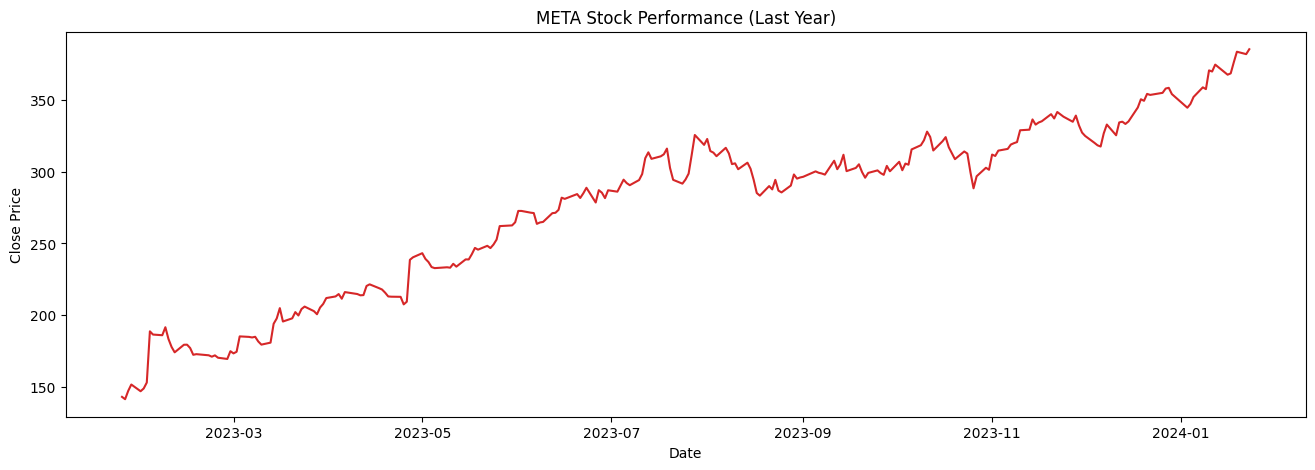

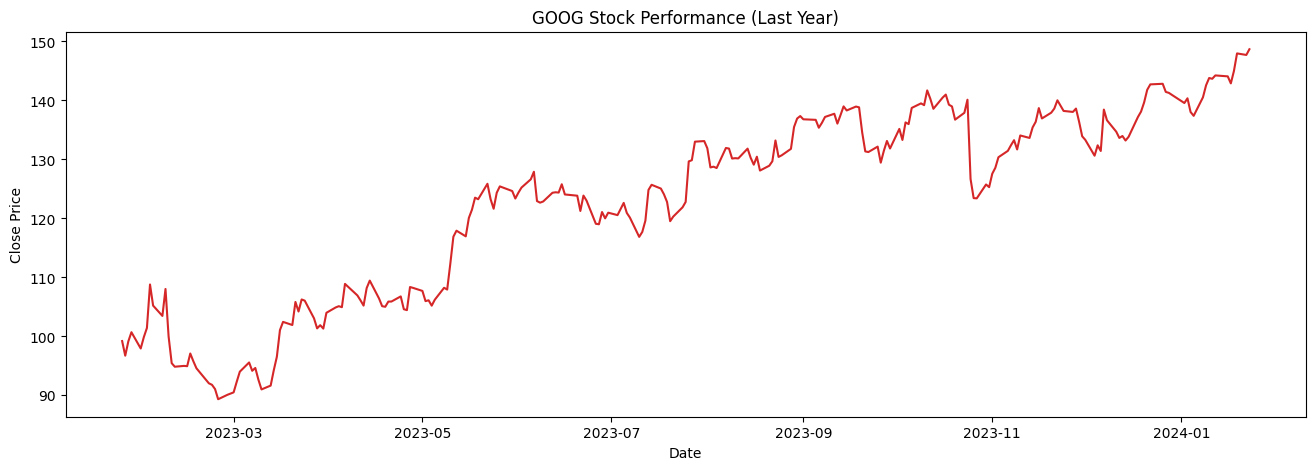

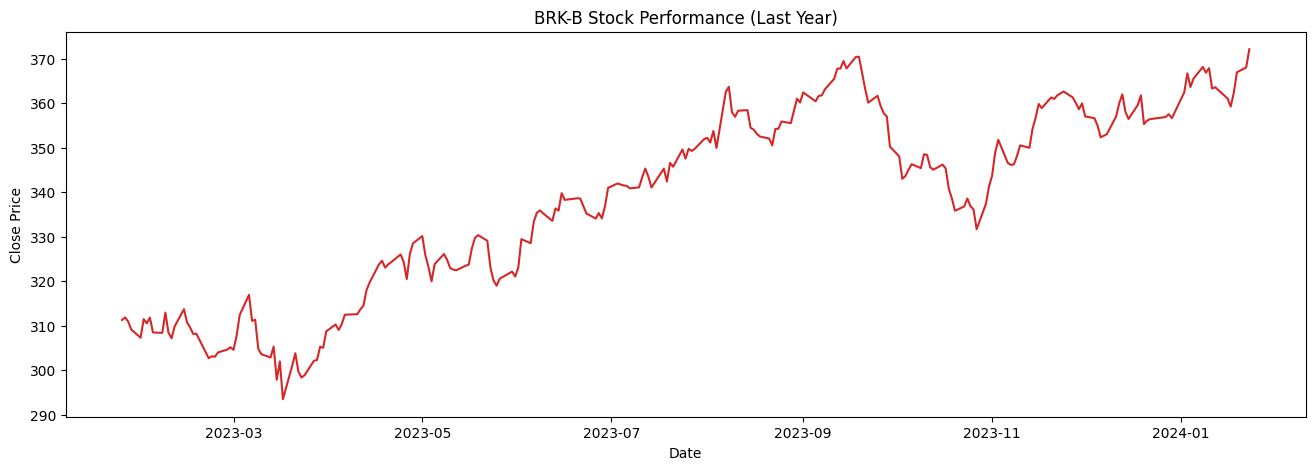

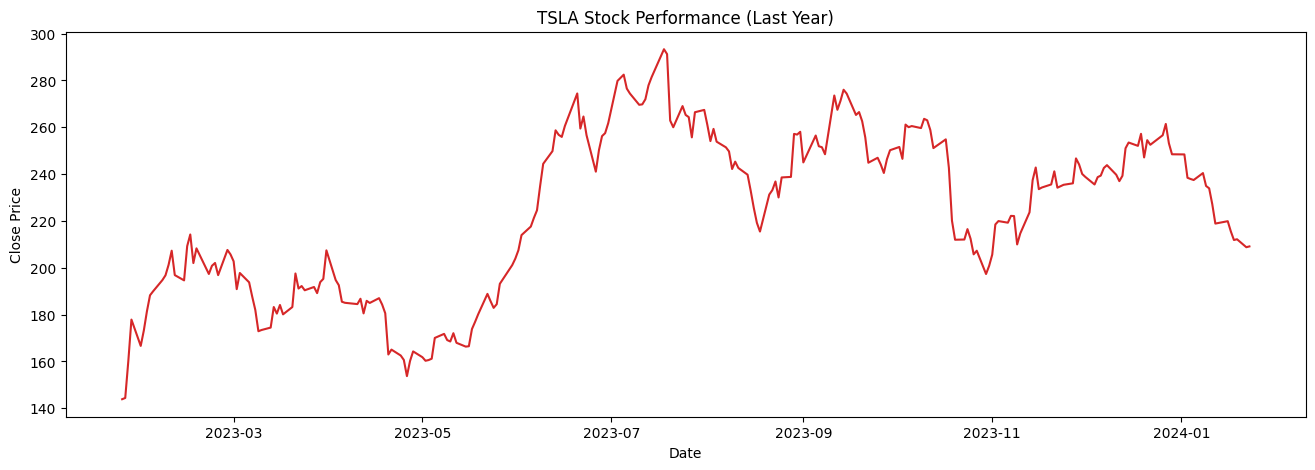

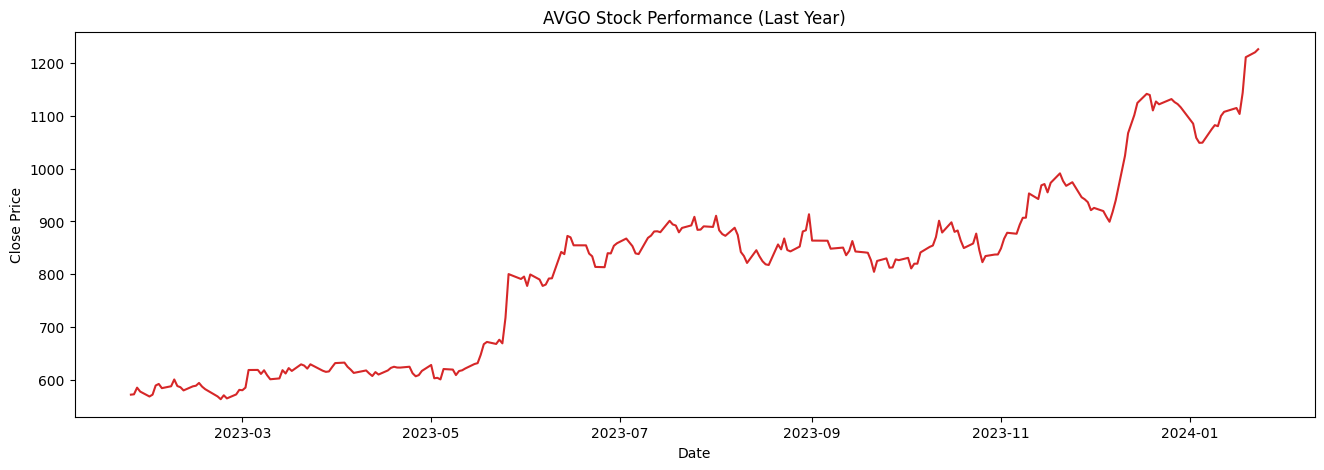

In [ ]:
import matplotlib.pyplot as plt
# Data Exploration
# Setting up a plot function to reuse at later stages of this analysis
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# List of ticker symbols
tickers = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'GOOG', 'BRK-B', 'TSLA', 'AVGO']

# Loop through each ticker
for stock_name in tickers:
    ticker = yf.Ticker(stock_name)
    history = ticker.history(period="1y")  # Adjust period as needed

    # Create DataFrame
    df = pd.DataFrame(history)
    x = df.index
    y = df['Close']

    # Plotting the data
    title = f"{stock_name} Stock Performance (Last Year)"
    df_plot(df, x, y, title=title, xlabel='Date', ylabel='Close Price', dpi=100)


In [ ]:
# Data Processing and scaling
df.reset_index(inplace=True) # to reset index and convert it to column

In [ ]:
df.head(100)

,index,date,open,high,low,close,vol,divs,split
0,0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
1,1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2,2,2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
3,3,2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
4,4,2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,95,2019-01-30 00:00:00-05:00,6.94,7.55,6.92,7.46,28775000,0.0,0.0
96,96,2019-01-31 00:00:00-05:00,7.40,7.89,7.40,7.88,21233900,0.0,0.0
97,97,2019-02-01 00:00:00-05:00,7.85,8.11,7.68,7.90,20788800,0.0,0.0
98,98,2019-02-04 00:00:00-05:00,7.96,7.98,7.74,7.85,8585300,0.0,0.0


from matplotlib import pyplot as plt
_df_16['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='index', y='open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['high']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('high')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
_df_28['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.columns = ['date','open','high','low','close','vol','divs','split']

In [ ]:
df.drop(columns=['divs','split']).head(2) # We are dropping un necessary columns from the set

,date,open,high,low,close,vol
0,2023-01-24 00:00:00-05:00,565.567913,573.634325,562.820447,572.011292,1382500
1,2023-01-25 00:00:00-05:00,564.815027,573.908062,563.221295,572.646790,1376600


In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
df.describe()

,open,high,low,close,vol,divs,split
count,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03,1349.0,1349.0
mean,17.213669,17.750997,16.622402,17.194863,6.240454e+07,0.0,0.0
std,15.136968,15.564721,14.622806,15.110395,5.625752e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,6.410000,6.640000,6.130000,6.390000,3.210320e+07,0.0,0.0
50%,10.460000,10.810000,10.220000,10.530000,4.889430e+07,0.0,0.0
75%,23.760000,24.540001,22.780001,23.760000,7.331560e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [ ]:
print(len(df))
649

1349


649

In [ ]:
x = df[['open', 'high','low', 'vol']]
y = df['close']

In [ ]:
from sklearn.model_selection import train_test_split
# Linear regression Model for stock prediction
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
(551, 4)
(98, 4)
(551,)
(98,)

(213, 4)
(38, 4)
(213,)
(38,)


(98,)

In [ ]:
import os
from IPython.display import Image
print("**Linear Regression Formula**")



**Linear Regression Formula**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)


regression coefficient [-6.58096335e-01  5.80977026e-01  1.08558365e+00 -4.72677846e-07]
regression intercept -0.468139159686757


In [ ]:
# the coefficient of determination R²
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9923479155742544


In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

           open        high         low      vol
213  935.637738  946.507738  929.884165  3902500
214  943.999317  955.038522  935.070342  3484300
215  936.692863  938.106346  914.166440  4957100
216  918.237759  929.625398  903.843923  2960300
217  916.426069  926.708743  912.245282  2500900


In [ ]:
predicted.shape

(38,)

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
213,942.018372,941.313768
214,936.523682,946.594936
215,921.492737,918.176987
216,925.743225,915.132875
217,919.740784,923.968157
218,908.940491,909.953591
219,899.503906,903.962282
220,918.038696,915.191848
221,939.977783,922.183227
222,1024.529053,1002.159252


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,38.000000,38.000000
mean,1067.385461,1066.172657
std,91.474579,91.932533
min,899.503906,903.962282
25%,1030.649292,1014.184412
50%,1092.679993,1089.992394
75%,1124.029236,1124.205985
max,1226.310059,1224.644663


In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 6.126704782841303
Mean Squared Error (MSE) : 62.344582184153595
Root Mean Squared Error (RMSE): 7.8958585463617315


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,38.000000,38.000000
mean,1067.385461,1066.172657
std,91.474579,91.932533
min,899.503906,903.962282
25%,1030.649292,1014.184412
50%,1092.679993,1089.992394
75%,1124.029236,1124.205985
max,1226.310059,1224.644663


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.11375302823855


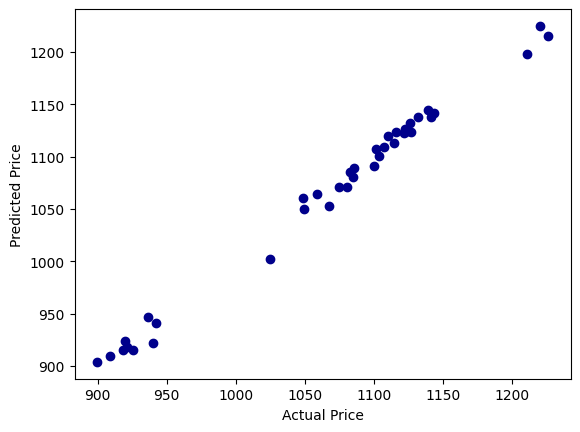

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

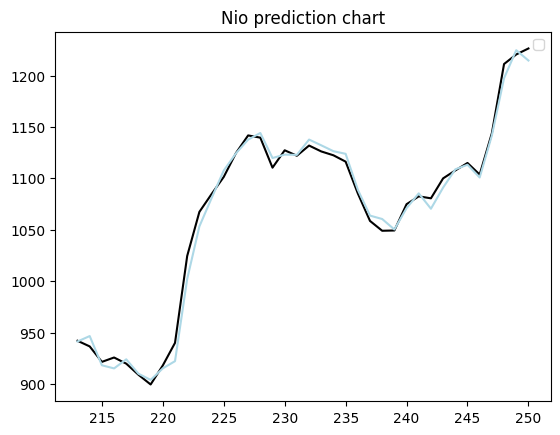

In [ ]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Nio prediction chart")
plt.legend();

[*********************100%%**********************]  1 of 1 completed


R² Score: -29.66

Stock: MSFT
Mean Absolute Error: 91.75972319852923
Mean Squared Error: 9092.338815932337
Root Mean Squared Error: 95.35375617107245


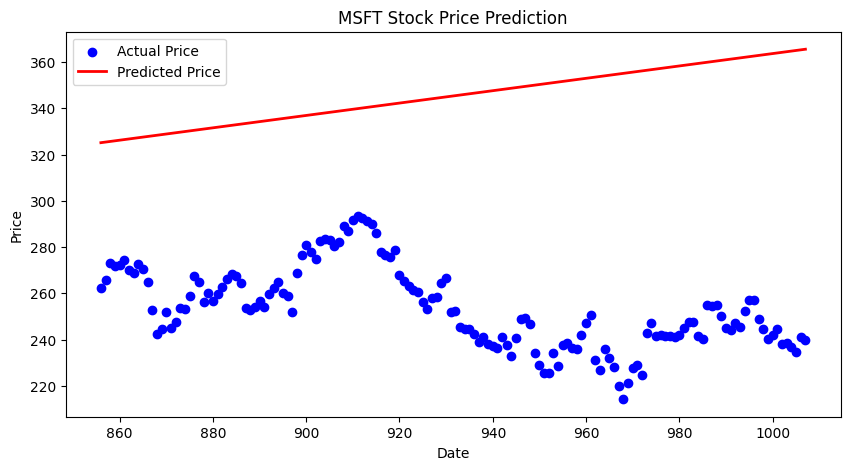

[*********************100%%**********************]  1 of 1 completed


R² Score: -16.24

Stock: AAPL
Mean Absolute Error: 41.783100722556185
Mean Squared Error: 1951.8864961271404
Root Mean Squared Error: 44.1801595303496


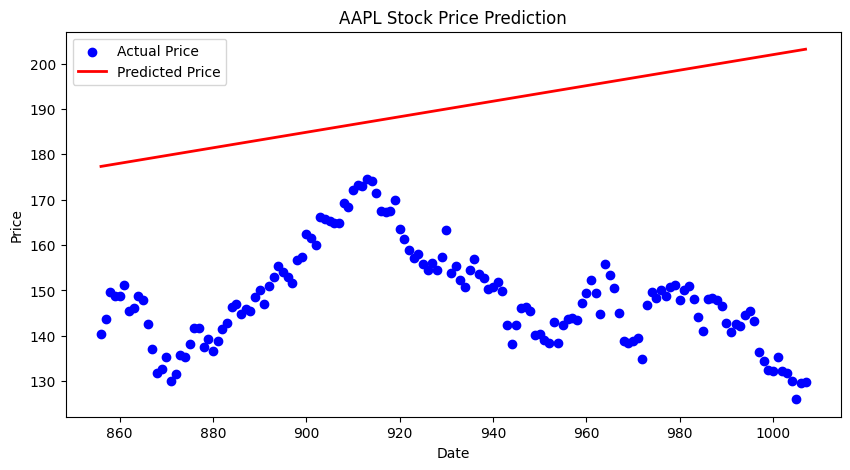

[*********************100%%**********************]  1 of 1 completed


R² Score: -33.12

Stock: NVDA
Mean Absolute Error: 121.56029803191575
Mean Squared Error: 15619.910479242693
Root Mean Squared Error: 124.97964025889455


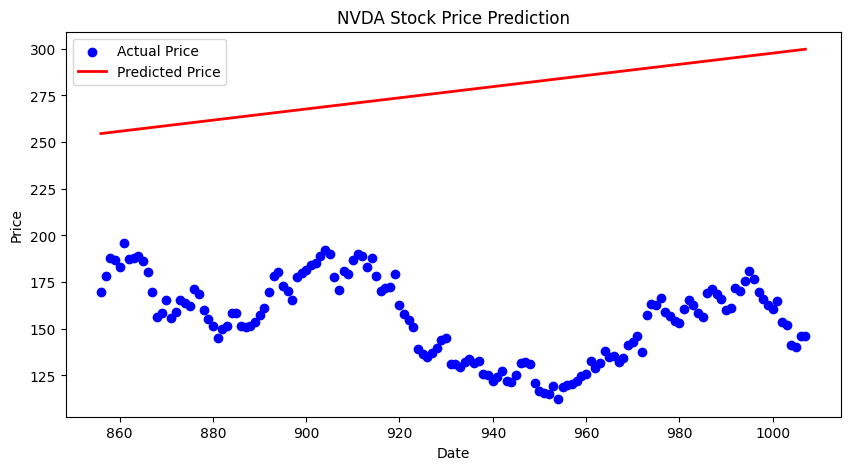

[*********************100%%**********************]  1 of 1 completed


R² Score: -22.71

Stock: AMZN
Mean Absolute Error: 78.20279902065222
Mean Squared Error: 6519.850375653347
Root Mean Squared Error: 80.74559044092344


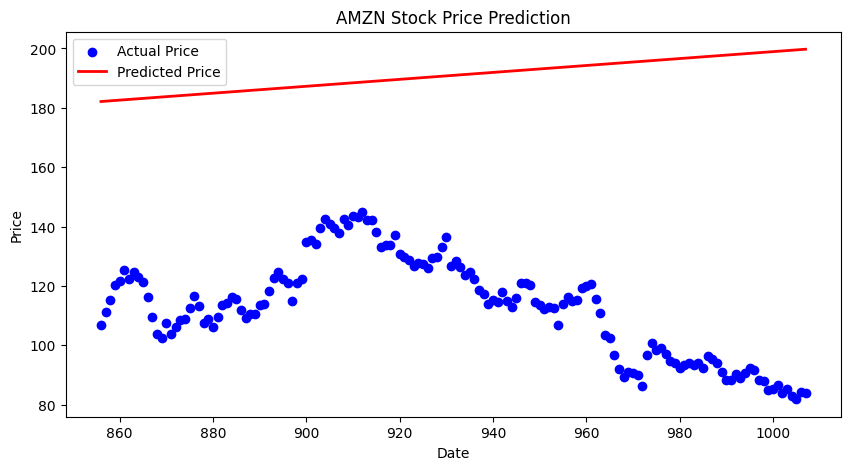

[*********************100%%**********************]  1 of 1 completed


R² Score: -24.05

Stock: GOOGL
Mean Absolute Error: 46.95694310337998
Mean Squared Error: 2415.112449046991
Root Mean Squared Error: 49.143793596414504


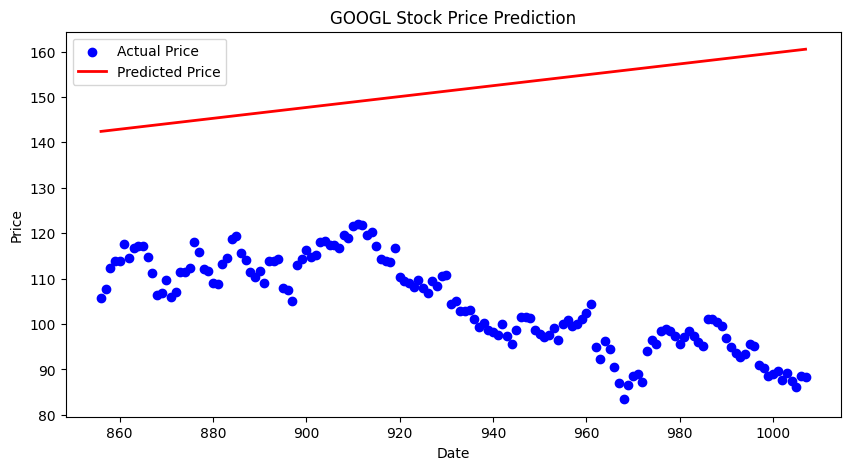

[*********************100%%**********************]  1 of 1 completed


R² Score: -48.09

Stock: META
Mean Absolute Error: 190.68153797317999
Mean Squared Error: 37585.39280655299
Root Mean Squared Error: 193.86952521361627


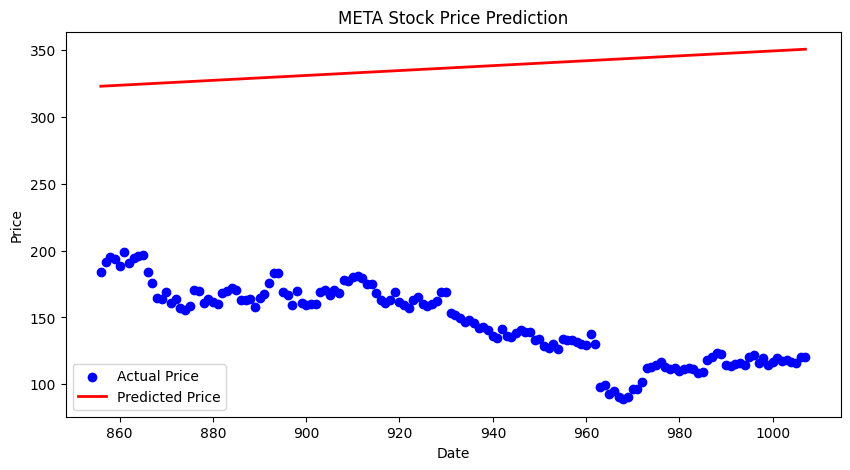

[*********************100%%**********************]  1 of 1 completed


R² Score: -24.14

Stock: GOOG
Mean Absolute Error: 47.65830057477038
Mean Squared Error: 2486.675008194796
Root Mean Squared Error: 49.866572051774284


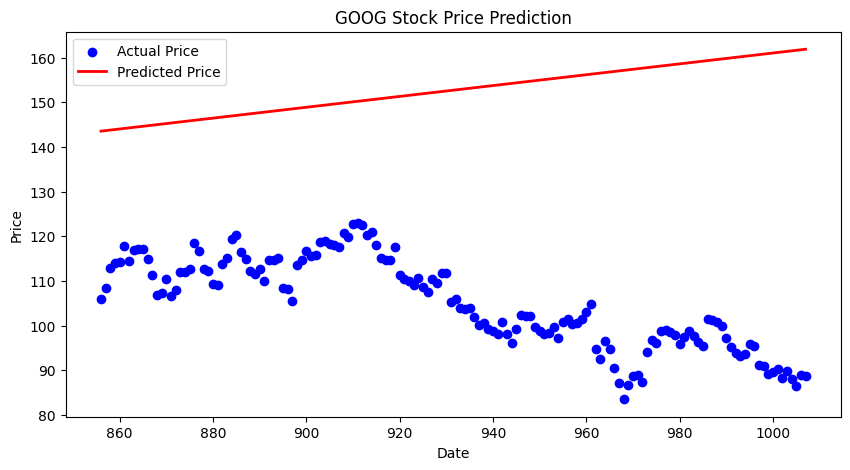

[*********************100%%**********************]  1 of 1 completed


R² Score: -3.35

Stock: BRK-B
Mean Absolute Error: 28.92734629044452
Mean Squared Error: 1015.4403380357563
Root Mean Squared Error: 31.86597461299052


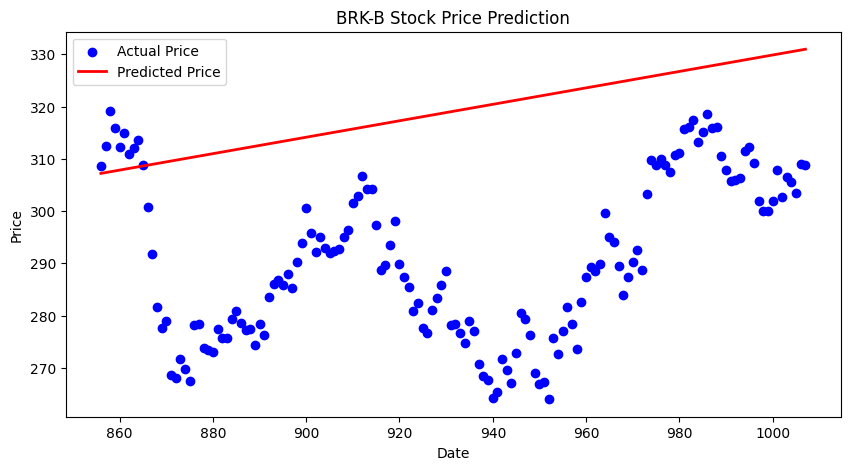

[*********************100%%**********************]  1 of 1 completed


R² Score: -8.64

Stock: TSLA
Mean Absolute Error: 139.58125526941174
Mean Squared Error: 23521.289776562666
Root Mean Squared Error: 153.3665210421188


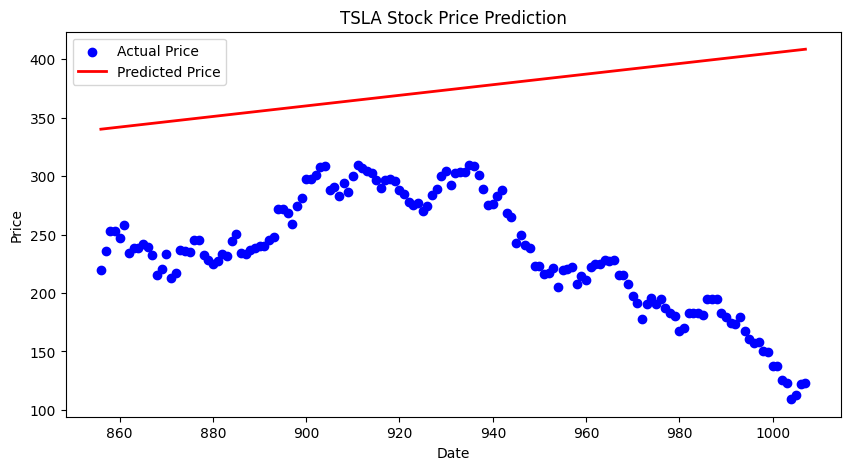

[*********************100%%**********************]  1 of 1 completed


R² Score: -7.95

Stock: AVGO
Mean Absolute Error: 105.81894489010402
Mean Squared Error: 13198.154579461829
Root Mean Squared Error: 114.8832214880042


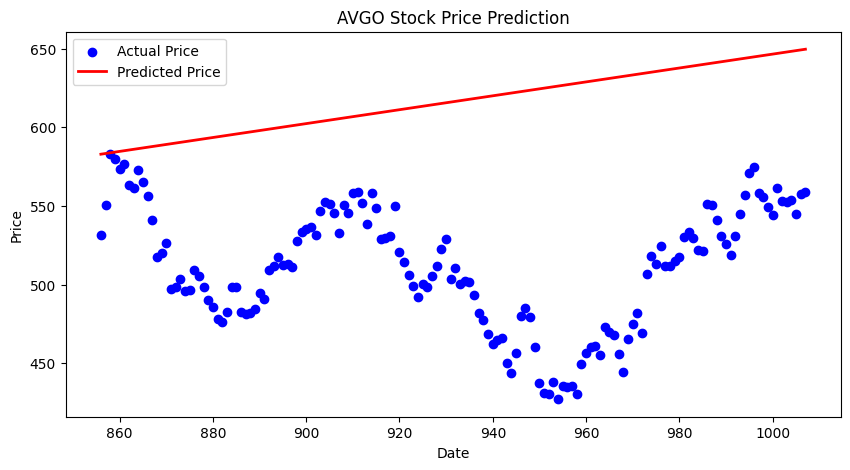

In [ ]:
# Import necessary libraries
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of stocks
stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'GOOG', 'BRK-B', 'TSLA', 'AVGO']

# Loop through each stock
for stock in stocks:
    # Fetch historical data for the stock
    data = yf.download(stock, start="2019-01-01", end="2023-01-01")
    data.reset_index(inplace=True)

    # Define x and y
    x = data.index.values.reshape(-1, 1)  # Using index (i.e., time) as the feature
    y = data['Close'].values

    # Split the data
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, shuffle=False)

    # Create and train the model
    model = LinearRegression()
    model.fit(train_x, train_y)

    # Make predictions
    predicted = model.predict(test_x)

    # The R² score ranges from 0 to 1, where a higher score indicates a better fit of the model to the data.
    # An R² score of 1 indicates perfect prediction, while a score of 0 would indicate that the model performs no better than simply predicting the mean of the target variable for all observations.
    r2 = r2_score(test_y, predicted)
    print(f'R² Score: {r2:.2f}')

    # Model Evaluation
    print(f'\nStock: {stock}')
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted))
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predicted))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.scatter(test_x, test_y, color='blue', label='Actual Price')
    plt.plot(test_x, predicted, color='red', linewidth=2, label='Predicted Price')
    plt.title(f'{stock} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
